# Science Policy Brief: Nexus of Green Transition with Automation and COVID-19
Felix Zaussinger | 12.01.2022

## Core Analysis Goal(s)
1.
2.
3.

## Key Insight(s)
1.
2.
3.

In [1]:
import os
import sys
import logging
from pathlib import Path

import numpy as np
import scipy
import scikit_posthocs as sp

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("ticks")

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

Define directory structure

In [2]:
# project directory
abspath = os.path.abspath('')
project_dir = str(Path(abspath).parents[0])

# sub-directories
data_raw = os.path.join(project_dir, "data", "raw")
data_interim = os.path.join(project_dir, "data", "interim")
data_processed = os.path.join(project_dir, "data", "processed")
figure_dir = os.path.join(project_dir, "reports", "figures")

#### Pre-processing

Metadata

In [3]:
df_metadata = pd.read_csv(
    os.path.join(data_interim, "ESCO_ONET_METADATA_gbn.csv"),
    index_col=0
)

Automation & COVID

In [4]:
occ_profiles = pd.read_csv(
    os.path.join(data_raw, "mcc_data", "processed", "ESCO_occupation_profiles.csv")
)

cols = ["concept_uri", "risk", "prevalence", "risk_category", "remote_labor_index", "physical_proximity", "exposure_score"]

In [5]:
df_merged = pd.merge(
    df_metadata,
    occ_profiles[cols],
    on="concept_uri",
    how="left"
)

df_merged["occ_type"] = df_merged[["is_brown", "is_neutral", "is_green"]].idxmax(axis=1)

Coreness

In [6]:
mean_coreness = pd.read_csv(
    os.path.join(data_processed, "science_policy_brief", "mean_coreness.csv"),
    #index_col=0
)

In [7]:
df_merged = pd.merge(
    df_merged,
    mean_coreness,
    on="concept_uri",
    how="left"
)

In [8]:
df_merged_long = df_merged.melt(
    id_vars=["mean_coreness", "occ_type"],
    value_vars=["risk", "prevalence", "physical_proximity", "exposure_score", "remote_labor_index"]
)

#### Does skill coreness correlate with automation risk (SML)?

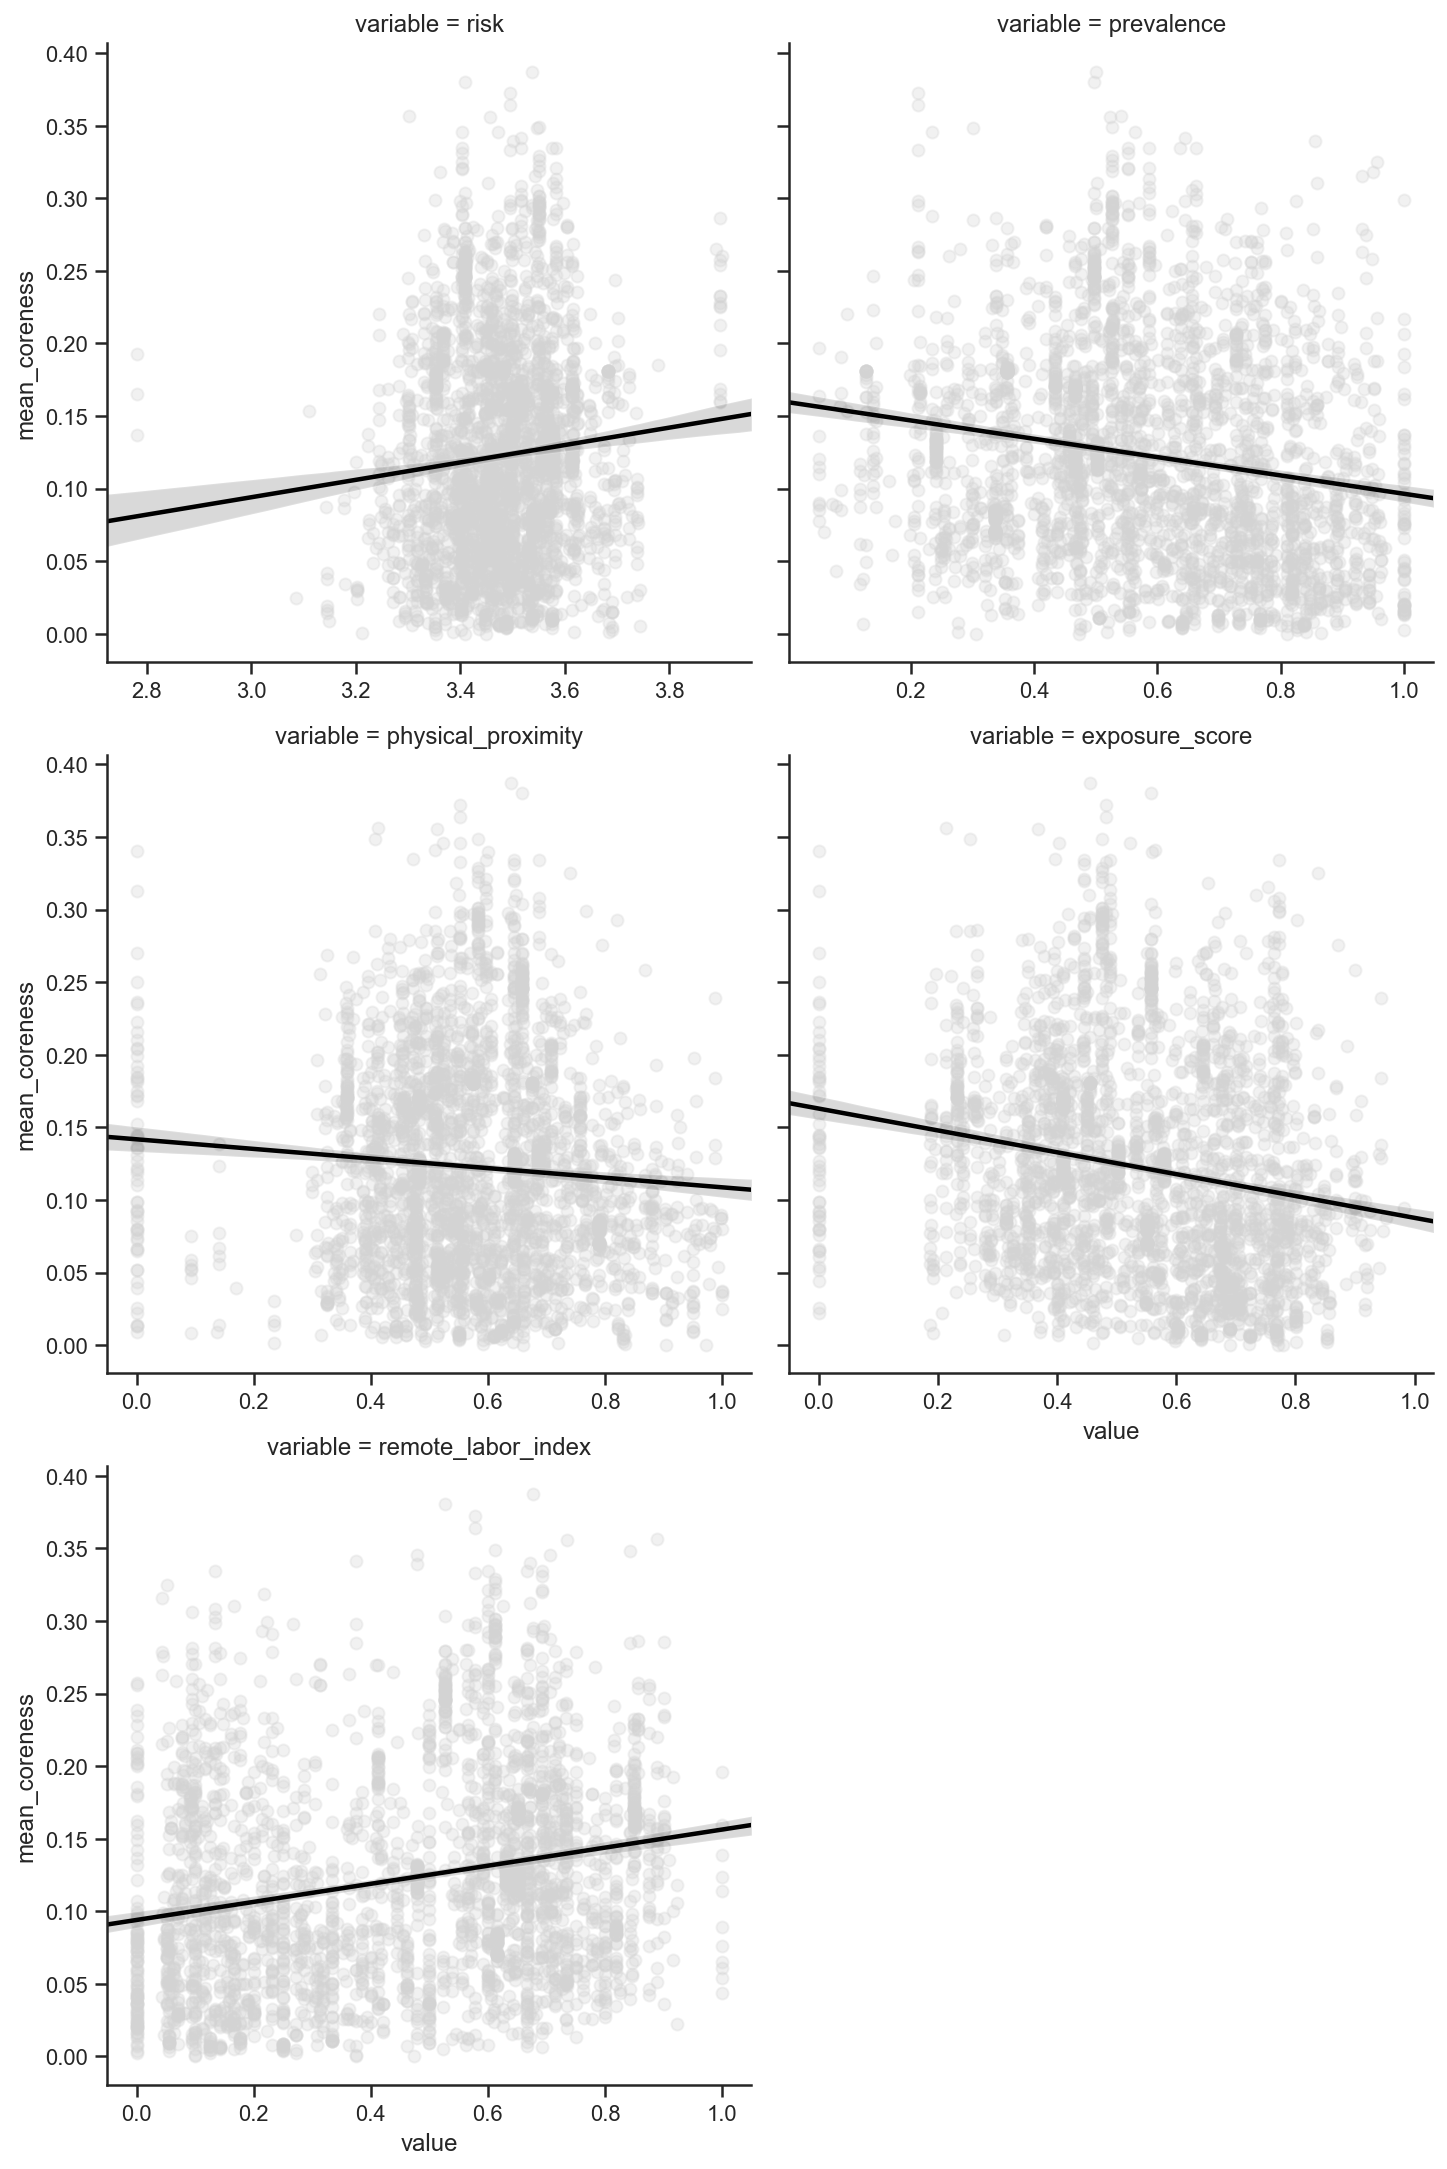

In [9]:
sns.lmplot(
    x="value",
    y="mean_coreness",
    col="variable",
    col_wrap=2,
    truncate=False,
    sharex=False,
    scatter_kws={"color": "lightgrey", "alpha": 0.3},
    line_kws={"color": "black"},
    data=df_merged_long
)

plt.savefig(
    os.path.join(figure_dir, "science_policy_brief", "exploratory_regplots_all.png"),
    bbox_inches="tight",
    dpi=150
)

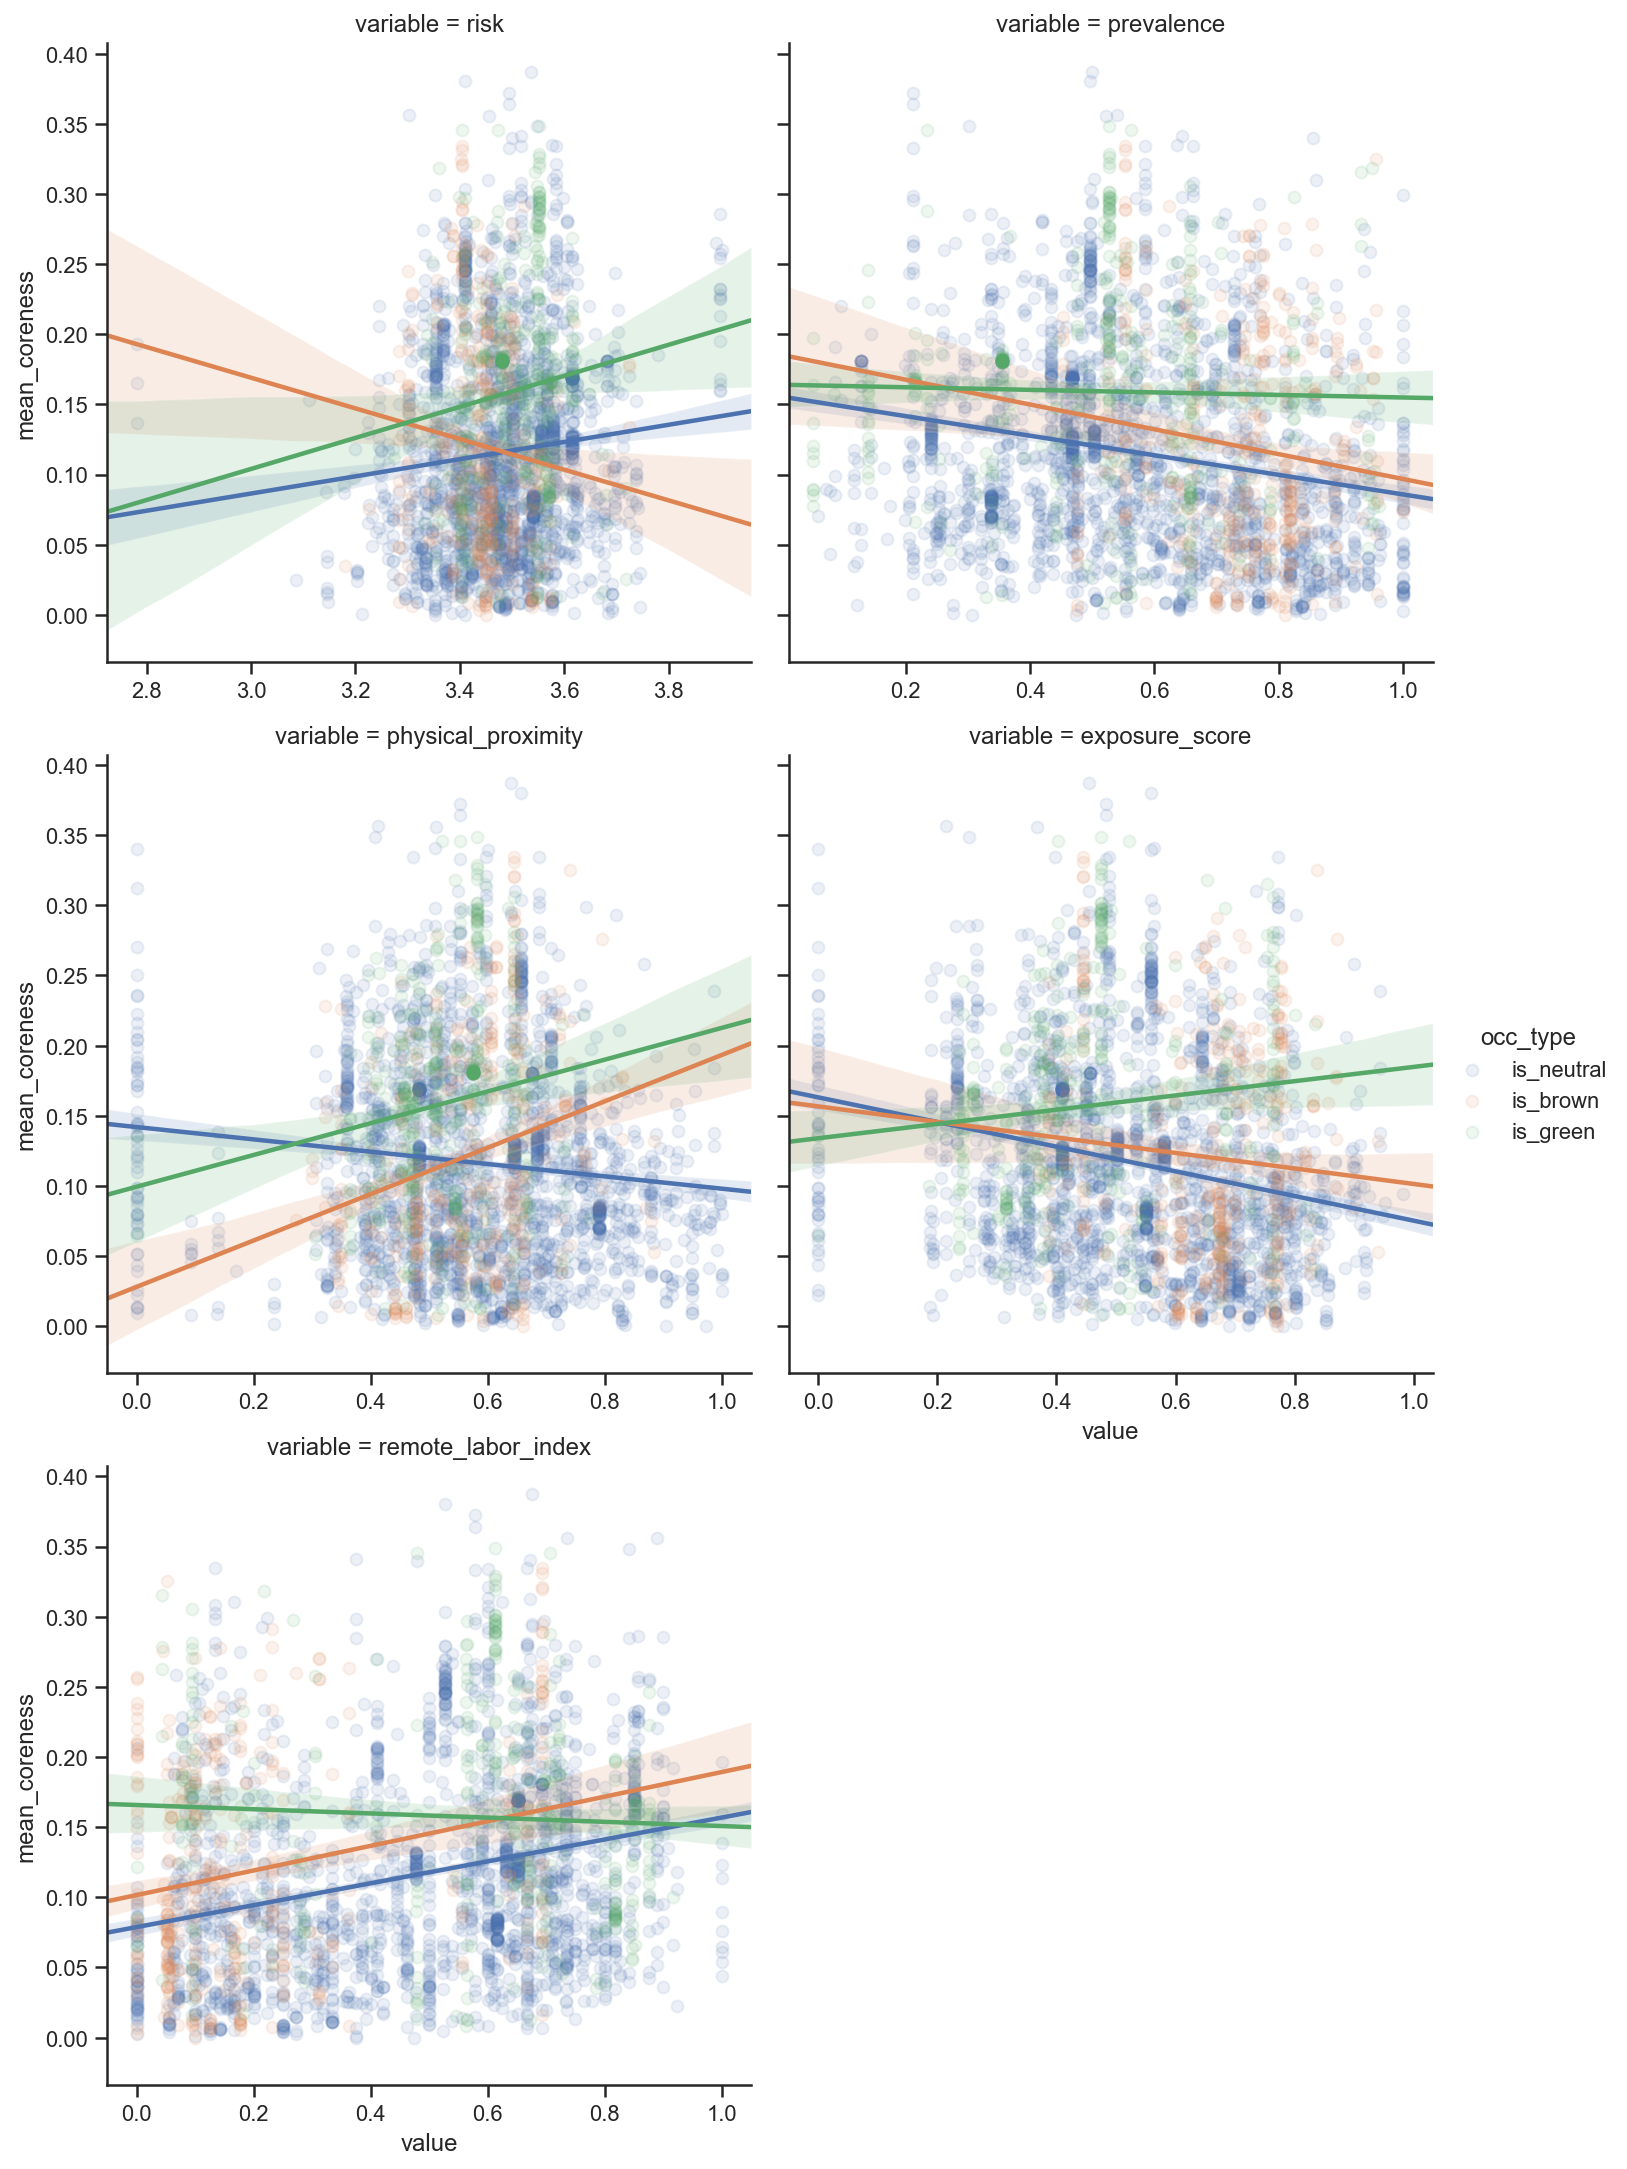

In [10]:
sns.lmplot(
    x="value",
    y="mean_coreness",
    hue="occ_type",
    col="variable",
    col_wrap=2,
    truncate=False,
    sharex=False,
    scatter_kws={"alpha": 0.1},
    #line_kws={"color": "black"},
    data=df_merged_long
)

plt.savefig(
    os.path.join(figure_dir, "science_policy_brief", "exploratory_regplots_gbn.png"),
    bbox_inches="tight",
    dpi=150
)

#### Correlations

In [16]:
all_vars = ["mean_coreness", "risk", "prevalence", "physical_proximity", "exposure_score", "remote_labor_index"]

import pingouin as pg

corrs = pg.pairwise_corr(
    df_merged[all_vars]
)

corrs.iloc[0:5,:].round(2)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,mean_coreness,risk,pearson,two-sided,2857,0.09,"[0.05, 0.12]",0.0,1442.939,1.00
1,mean_coreness,prevalence,pearson,two-sided,2857,-0.18,"[-0.21, -0.14]",0.0,3.503e+18,1.00
2,mean_coreness,physical_proximity,pearson,two-sided,2920,-0.08,"[-0.11, -0.04]",0.0,93.231,0.98
3,mean_coreness,exposure_score,pearson,two-sided,2781,-0.19,"[-0.23, -0.15]",0.0,5.586e+20,1.00
4,mean_coreness,remote_labor_index,pearson,two-sided,2781,0.22,"[0.19, 0.26]",0.0,5.346e+28,1.00
